<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [2]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [5]:
df['species'].unique()     #Se revisarán todos los valores únicos de especie que contenga el dataframe.
df.species = df.species.str.lower().str.strip()      #Solamente se tendrán ahora columnas con minúsculas
df.loc[df['species'].isnull(),'species'] = 'default' #Ahora todos lo NaN pasan a ser default
df['species'].unique()                               #Por último se hace lo mismo que antes y se vuentan los tipos de especie 
                                                        # el default.

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

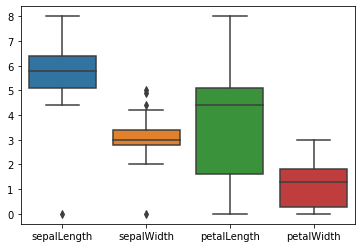

In [7]:
df.loc[df['sepalLength'].isnull(),'sepalLength'] = '0'                      #Se cambian los valores NaN por 0.
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = '0'                        
df.loc[df['petalLength'].isnull(),'petalLength'] = '0'                      
df.loc[df['petalWidth'].isnull(),'petalWidth'] = '0'                        

stats_df = df.drop(['species'], axis=1)                                     # Quitamos de nuestra data lo que no sirve.
                                                                           
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)                                                  

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [9]:
#Se realizará primero la confección de máscaras de forma manual,primero cambiando los valores 
#predeterminados de los pétalos a valores flotantes

df['sepalLength'] = df['sepalLength'].astype(float)                
df['sepalWidth'] = df['sepalWidth'].astype(float)                  
df['petalLength'] = df['petalLength'].astype(float)                
df['petalWidth'] = df['petalWidth'].astype(float) 

#Luego, realizamos un cambio en los datos, y tomaremos solamente los que nos piden en el cuadro inicial

df_pW_inf =  df['petalWidth']>=0.1                  
df_pW_sup =  df['petalWidth']<=2.5                    
df_sW_inf =  df['sepalWidth']>=2                    
df_sW_sup =  df['sepalWidth']<=4.5                  
df_pL_inf =  df['petalLength']>=1                   
df_pL_sup =  df['petalLength']<=7                   
df_sL_inf =  df['sepalLength']>=4                   
df_sL_sup =  df['sepalLength']<=7 

#Luego, se realizarán máscaras para proveer de la estructura de columnas al nuevo dataframe

mask_df_sL = df_sL_inf & df_sL_sup            
mask_df_sW = df_sW_inf & df_sW_sup            
mask_df_pL = df_pL_inf & df_pL_sup            
mask_df_pW = df_pW_inf & df_pW_sup
df_filtrado = df[mask_df_sL & mask_df_sW & mask_df_pL & mask_df_pW]  #Aplicamos las mascaras a nuestro data
df_filtrado.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
5,6.7,3.1,5.6,2.4,virginica
6,5.8,2.8,5.1,2.4,virginica


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

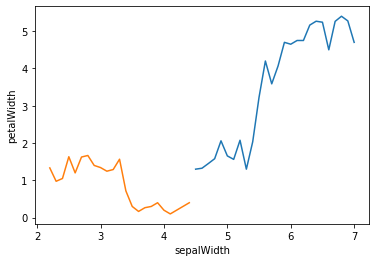

In [17]:
sns.lineplot(                                  
    x='sepalLength',                           
    y='petalLength',                           
    #hue='Generation',# color por Generation   
    data=df_filtrado,                          
    ci = None,                                             
)


sns.lineplot(                                  
    x='sepalWidth',                            
    y='petalWidth',                            
    #hue='Generation',# color por Generation   
    data=df_filtrado,                          
    ci = None,                                            
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

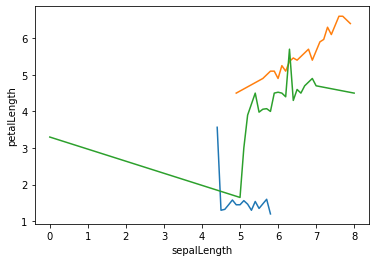

In [19]:
#Primero, definimos los nuevos conjuntos de data que necesitaremos graficar

df_set =  df['species'] == 'setosa'
df_vir =  df['species'] == 'virginica'
df_col =  df['species'] == 'versicolor'
df_def =  df['species'] == 'default' 

#Luego, bastará con solamente replicar en cada conjunto su gráfico respectivo. Utilizaremos Seaborn al igual que 
#En el lab pasado.

sns.lineplot(                                  
    x='sepalLength',                           
    y='petalLength',                           
    #hue='Generation',# color por Generation   
    data=df[df_set],                          
    ci = None,                                           
)

sns.lineplot(                                 
    x='sepalLength',                          
    y='petalLength',                          
    #hue='Generation',# color por Generation   
    data=df[df_vir],                          
    ci = None,                                            
)

sns.lineplot(                                 
    x='sepalLength',                          
    y='petalLength',                          
    #hue='Generation',# color por Generation   
    data=df[df_col],                          
    ci = None,                  
                           
)

sns.lineplot(                                  
    x='sepalLength',                           
    y='petalLength',                           
    #hue='Generation',# color por Generation   
    data=df[df_def],                          
    ci = None,                                            
)